# 2021-07-07 타이타닉
- 타이타닉 생존자 예측 튜토리얼 따라하기
- 시각화도구(matplotlib, seaborn, plotly)
- 데이터분석도구(pandas, numpy)
- 머신러닝 도구(sklearn)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


## 프로세스
- 1.데이터셋 확인
 - 대부분의 캐글 데이터들은 잘 정제 되어 있습니다. 하지만 가끔 Null data가 존재합니다. 이를 확인하고, 향후 수정합니다
- 2.탐색적 데이터 분석
 - 여러feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 통찰력을 얻습니다.
- 3.feature engineering
 - 모델을 세우기 전에 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다. one-hot encoding 합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.
- 4.model 만들기
 - sklearn 을 사용하여 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn 을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용 할 수 도 있습니다.
- 5.모델 학습 및 예측 
 - trainset 을 가지고 모델을 학습시킨 후, testset 을 가지고 prediction 합니다.
- 6.모델 평가
 - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는 지 확인해 봅시다

## 1.Dataset 확인
- pandas 를 사용하여 데이터셋의 간단한 통계적 분석부터, 복잡한 처리들을 간단한 메소드를 사용하여 해낼 수 있습니다.
- 파이썬으로 데이터분석을 한다고 하면 반드시 능숙해져야 할 라이브러리이므로, 여러 커널들을 공부하시면서 사용법에 익숙해지도록 반복 또 반복하시길 권장합니다.

##### 저장된 데이터 불러오기

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#### 데이터 확인

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 이 타이타닉 문제에서 feature는 Pclass, Age, SibSp, Parch, Fare 이며, 예측하려는 target label 은 Survived 입니다.

- 통계치 확인

In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- 통계치 확인

## 1.1 Null data check


In [ ]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of Nan value: {:.2f}%'.format(col, 100
* (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of Nan value: 0.00%
column:   Survived	 Percent of Nan value: 0.00%
column:     Pclass	 Percent of Nan value: 0.00%
column:       Name	 Percent of Nan value: 0.00%
column:        Sex	 Percent of Nan value: 0.00%
column:        Age	 Percent of Nan value: 19.87%
column:      SibSp	 Percent of Nan value: 0.00%
column:      Parch	 Percent of Nan value: 0.00%
column:     Ticket	 Percent of Nan value: 0.00%
column:       Fare	 Percent of Nan value: 0.00%
column:      Cabin	 Percent of Nan value: 77.10%
column:   Embarked	 Percent of Nan value: 0.22%


- Age, Cabin, Embarked에서 Null data 확인

In [ ]:
for col in df_test.columns:
    msg = 'colmun: {:>10}\t Percent of Nan value: {:.2f}%'.format(col, 100
* (df_test[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

colmun: PassengerId	 Percent of Nan value: 0.00%
colmun:     Pclass	 Percent of Nan value: 0.00%
colmun:       Name	 Percent of Nan value: 0.00%
colmun:        Sex	 Percent of Nan value: 0.00%
colmun:        Age	 Percent of Nan value: 9.65%
colmun:      SibSp	 Percent of Nan value: 0.00%
colmun:      Parch	 Percent of Nan value: 0.00%
colmun:     Ticket	 Percent of Nan value: 0.00%
colmun:       Fare	 Percent of Nan value: 0.11%
colmun:      Cabin	 Percent of Nan value: 36.70%
colmun:   Embarked	 Percent of Nan value: 0.00%


- Age, Fare, Cabin에서 Null data 확인

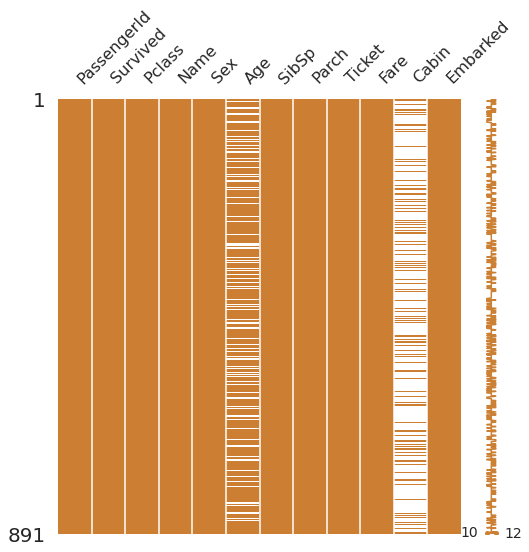

In [ ]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

- MANO 라이브러리를 사용하여 Null data 확인
- 흰색부분이 결측치

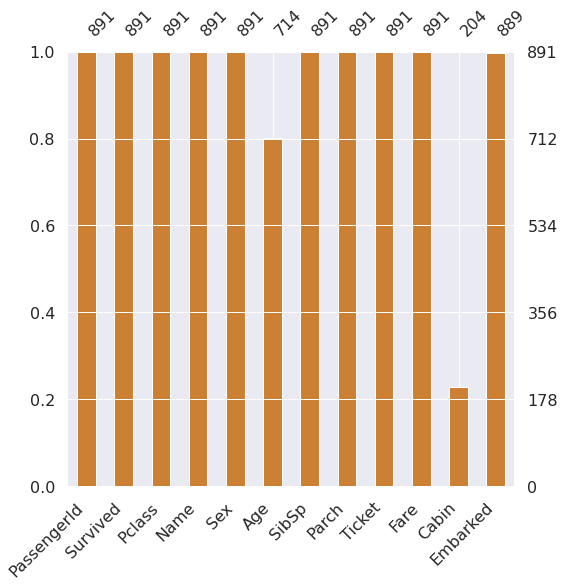

In [ ]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

- 빈 곳은 결측치

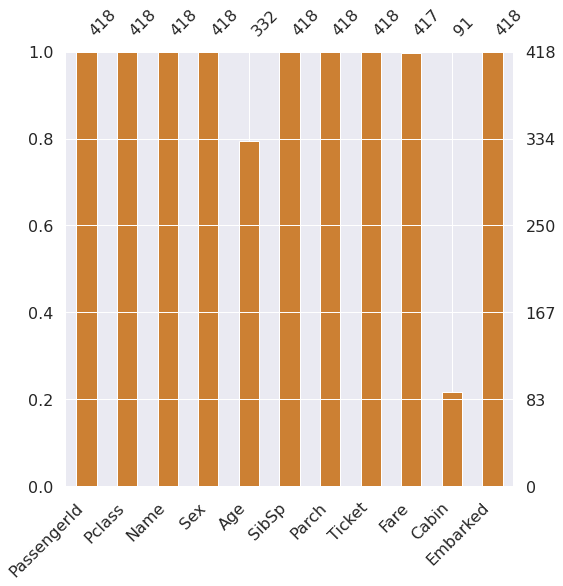

In [ ]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

- 빈 곳은 결측치

## 1.2 Target label 확인

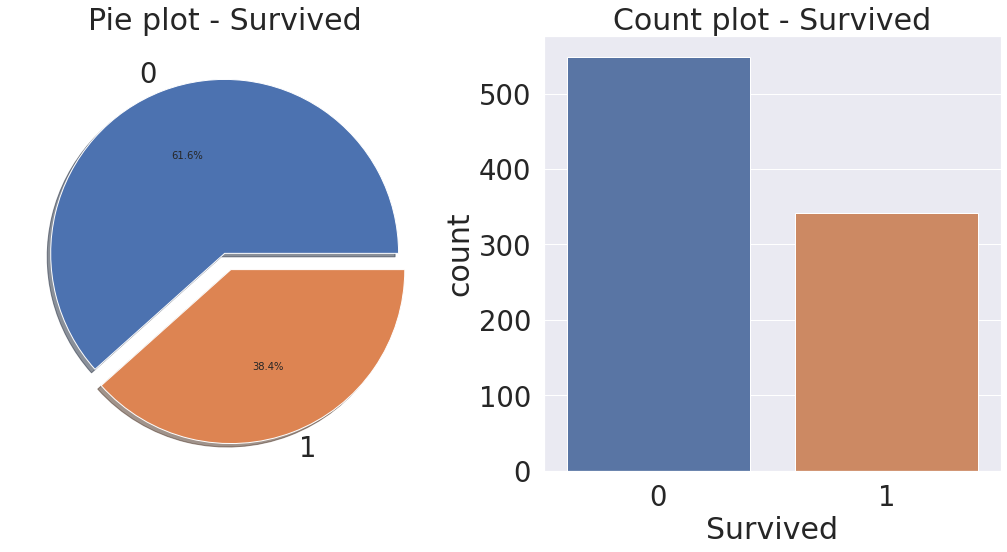

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%',
 ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax= ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 파랑: Dead 61.6%, 주황:Survived 38.4%

## 2. Exploratory data analysis(탐색적 데이터 분석)

### 2.1 Pclass(티켓의 클래스)

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


- 클래스별 사람의 수

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()


,Survived
Pclass,
1,136
2,87
3,119


- 클래스별 생존자의 수

In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.\
background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- pandas의 corsstab사용 
- 0 : Dead 1 : Survived

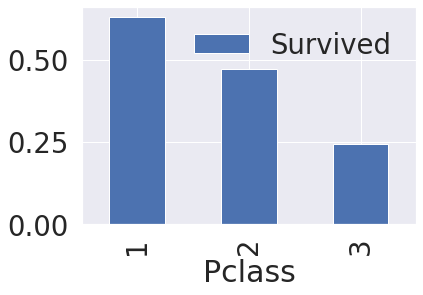

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().\
sort_values(by='Survived', ascending=False).plot.bar()

- 클래스별 생존률

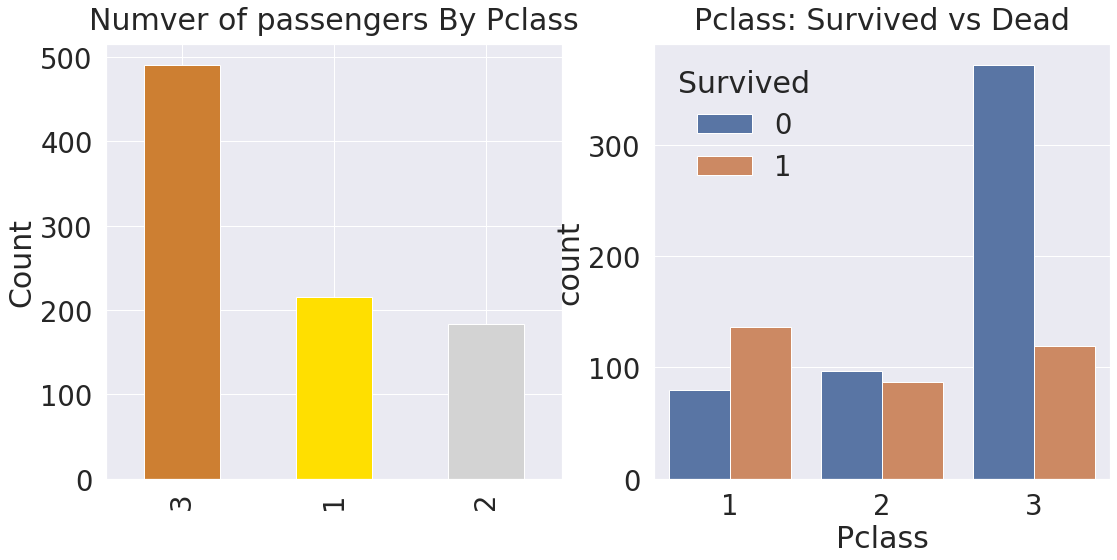

In [ ]:
y_position = 1.02
f, ax = plt.subplots(1,2, figsize=(18, 8))
df_train ['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3']
, ax=ax[0])
ax[0].set_title('Numver of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

- 분석결과
 - Pclass 1, 2, 3 순서대로 63%, 48%, 25%
 - 클래스가 높을수록 생존률도 높은 걸 확인
 - Pclass가 생존에 큰 영향을 끼친다

### 2.2 Sex(성별)
- 이번에는 성별에 따른 생존률을 확인해보겠습니다.
- pandas groupby 와 seaborn countplot 을 사용하여 시각화를 해봅시다.

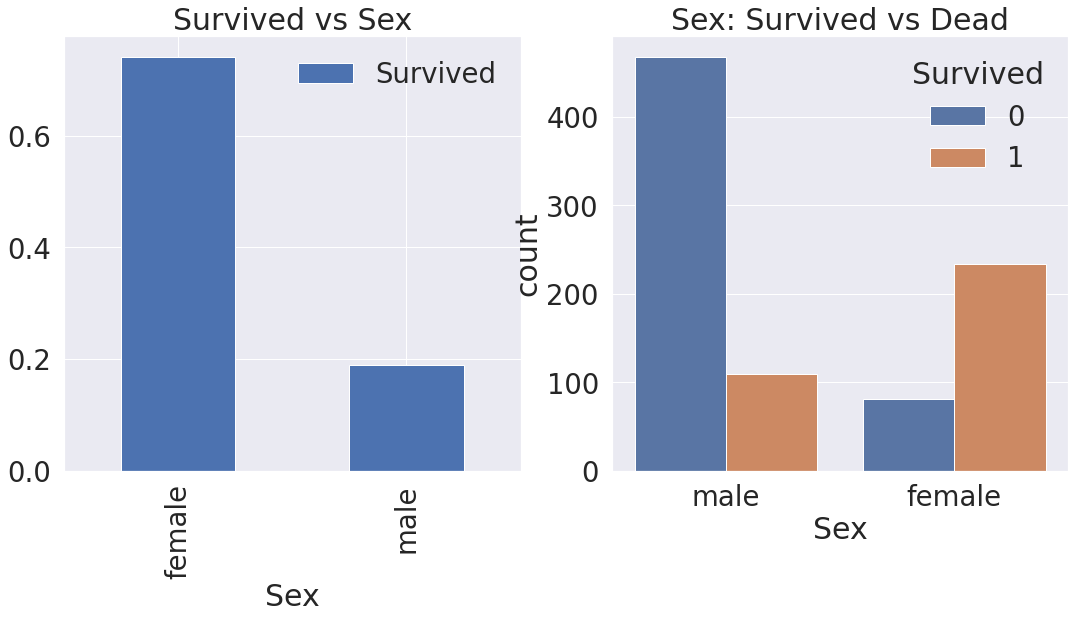

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.\
bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- 여성의 생존률이 높음

In [ ]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().\
sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.\
background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- 분석결과
 - Sex(성별)도 예측 모델에 사용할 중요한 feature

### 2.3 Both Sex and Pclass
- Sex와 Pclass, 두가지 feature에 관하여 생존이 얼마나 달라지는 지 확인
- seaborn 의 factorplot 을 사용하여 시각화해봅시다.

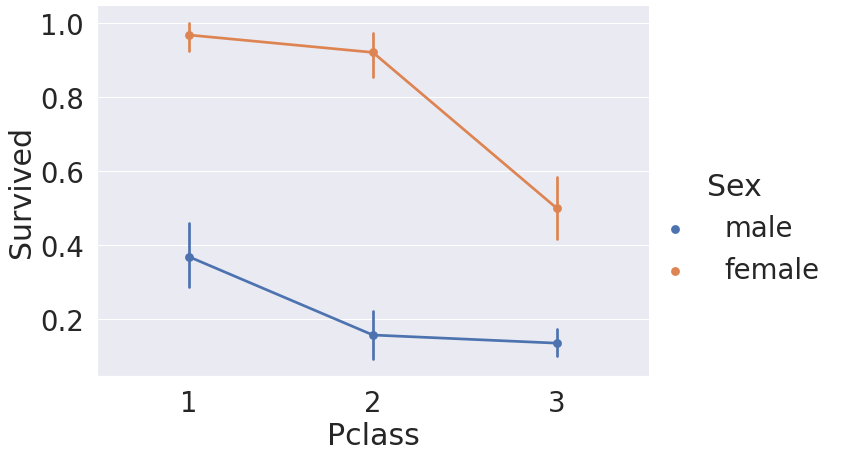

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

- 모든 클래스에서 여성이 살 확률이 높은 것을 확인

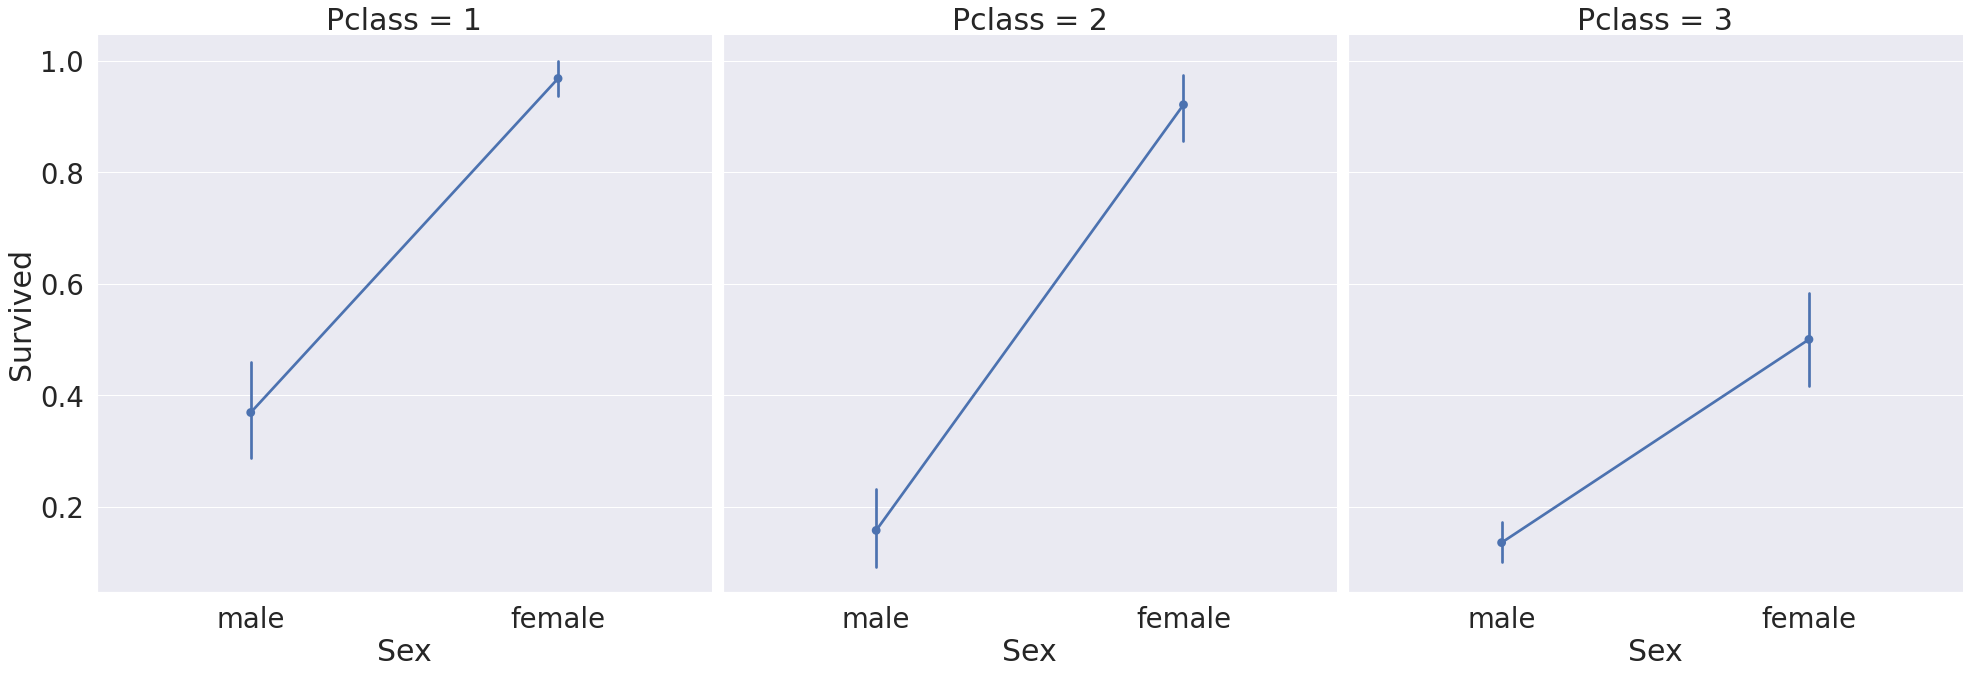

In [ ]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',
              data=df_train, satureation=.5, size=9, aspect=1 )

- 위 그래프를 hue 대신 column으로 했을 시

- 분석결과
 - Sex(성별)도 예측 모델에 사용할 중요한 feature

### 2.4 Age(나이)

In [ ]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


- 탑승객의 나이 확인
 - 나이가 어린 생존자가 많음(10~40대의 생존자가 많음)

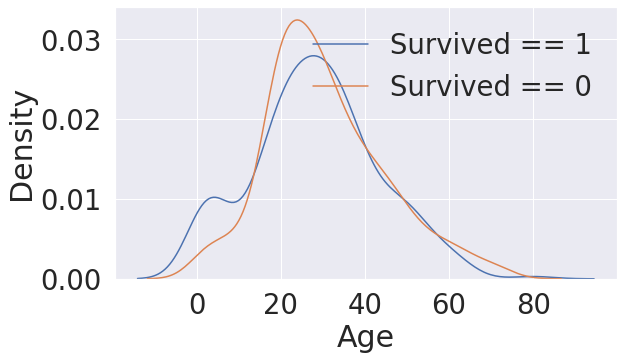

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

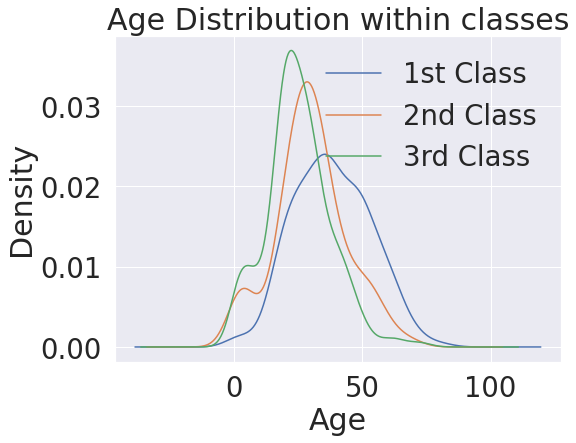

In [ ]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])


- Pclass가 낮을 수록 나이가 적은 사람의 비중이큼
- 나이대가 변하면서 생존률이 어떻게 바뀌는지 확인

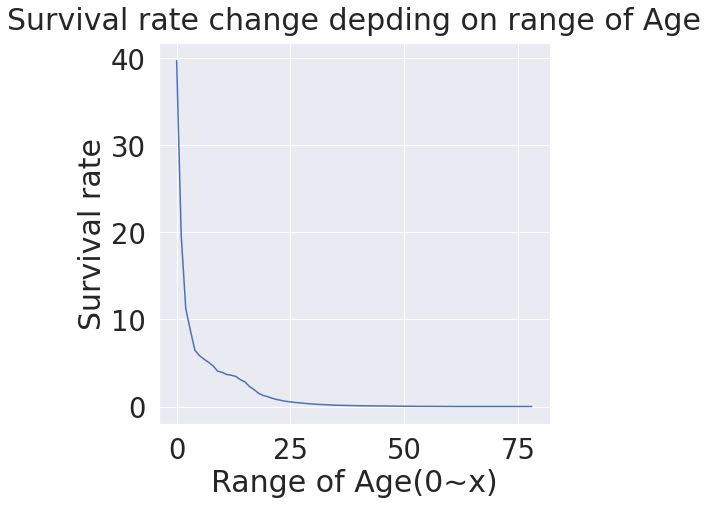

In [ ]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] > i]['Survived'].
    sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depding on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 분석결과: 나이가 어릴 수록 생존률이 확실히 높다는 것을 확인
 - Age(나이)는 중요한 feature

### 2.5 Pclass, Sex, Age


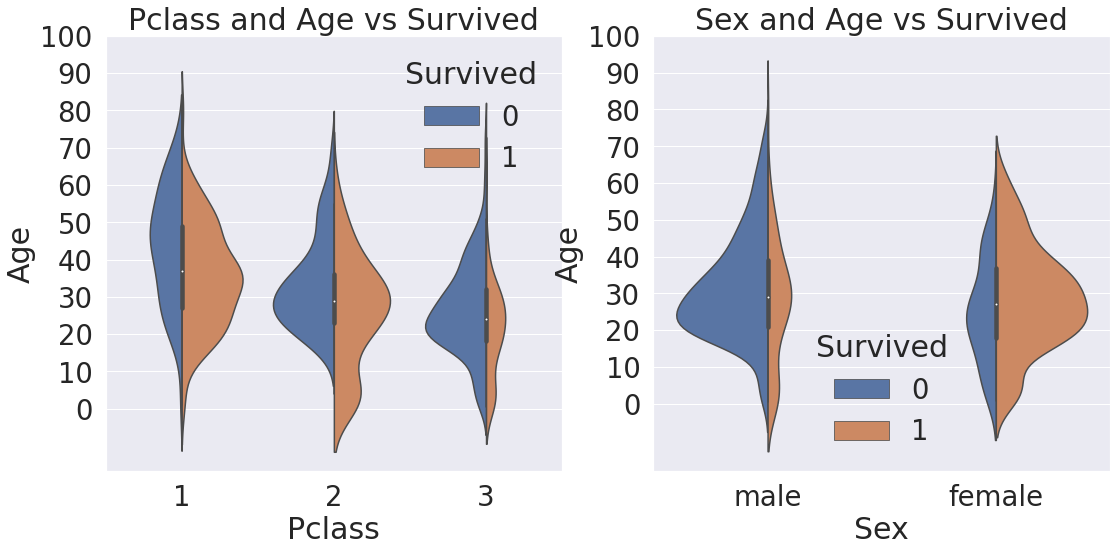

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=df_train, scale='count',
split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex", "Age", hue="Survived", data=df_train, scale='count',
split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 모든 클래스에서 나이가 어릴 수록 생존을 많이 한 것을 확인
- 오른쪽 그래프를 보면, 명확하게 여성가 많이 생존 한 것을 확인
- 여성과 아이를 먼저 챙긴 것을 확인

### 2.6 Embarked(탑승한 항구)

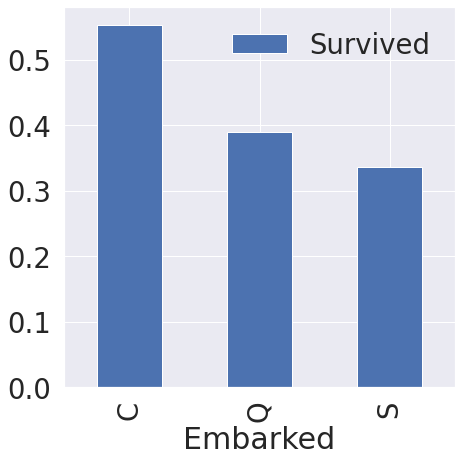

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().\
sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

- C의 생존률이 제일 높음

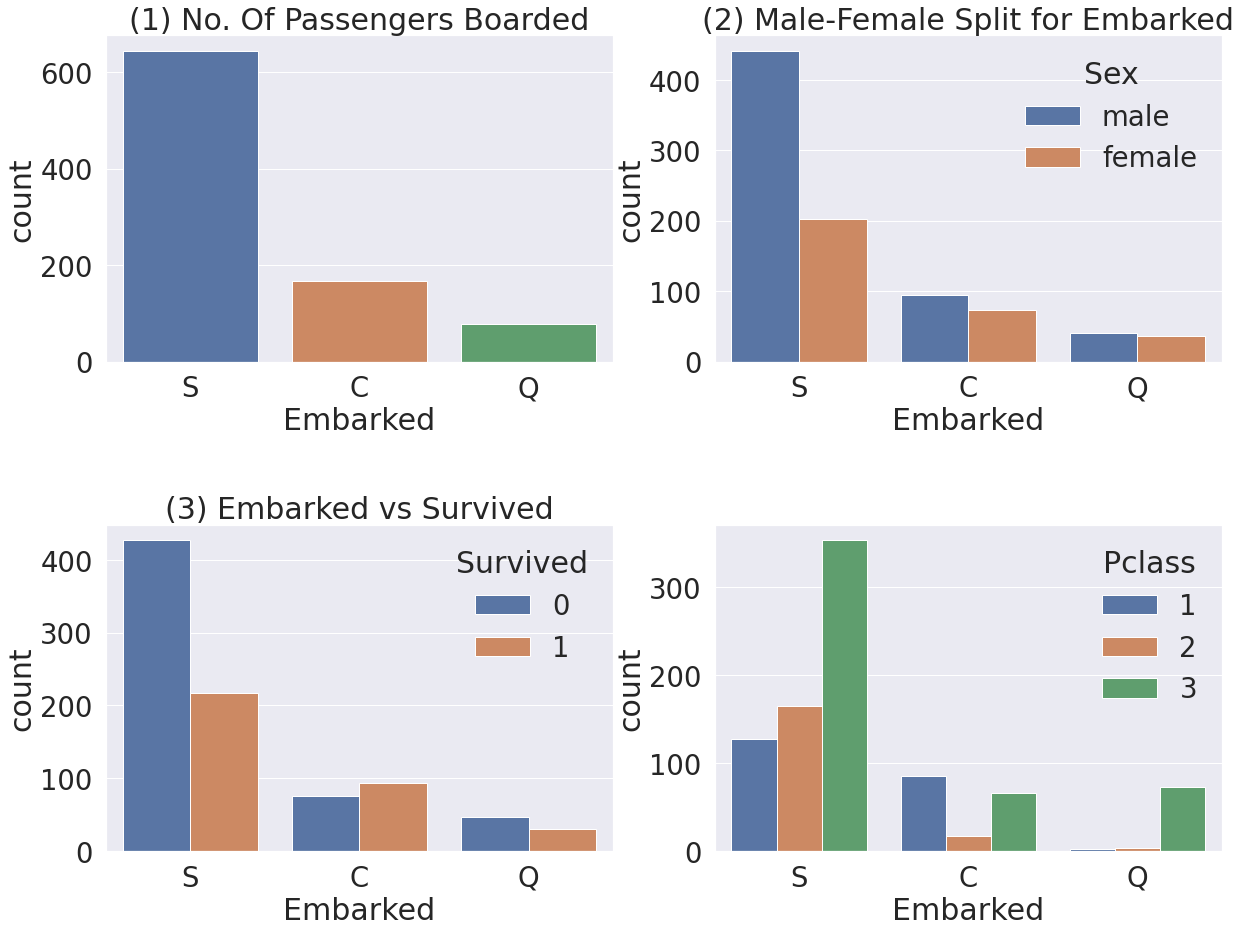

In [ ]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


- (1)그래프의 경우 S에서 가장 많은 사람이 탑승했다는 걸 확인
- (2)그래프의 경우 S에서 남녀비율이 2배정도 차이나고, 나머지 C와 Q는 비율이 비슷하다는걸 확인
- (3)그래프의 경우 S가 생존자의 수는 많지만 생존확률은 많이 낮은것을 확인
- (4)그래프의 경우 S에서 Pclass3이 많은 걸 알 수 있는데 앞의 결과에서 3rd Pclass가 가장 생존률이 낮았었으며,
   C에서는 1st Pclass가 많으므로 C의 생존확률이 높았다고 할 수 있다.

### 2.7 Family(가족)
- SibSp + Parch = Family

In [ ]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 

- 자신을 포함해야하니 1을 더합니다

In [ ]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


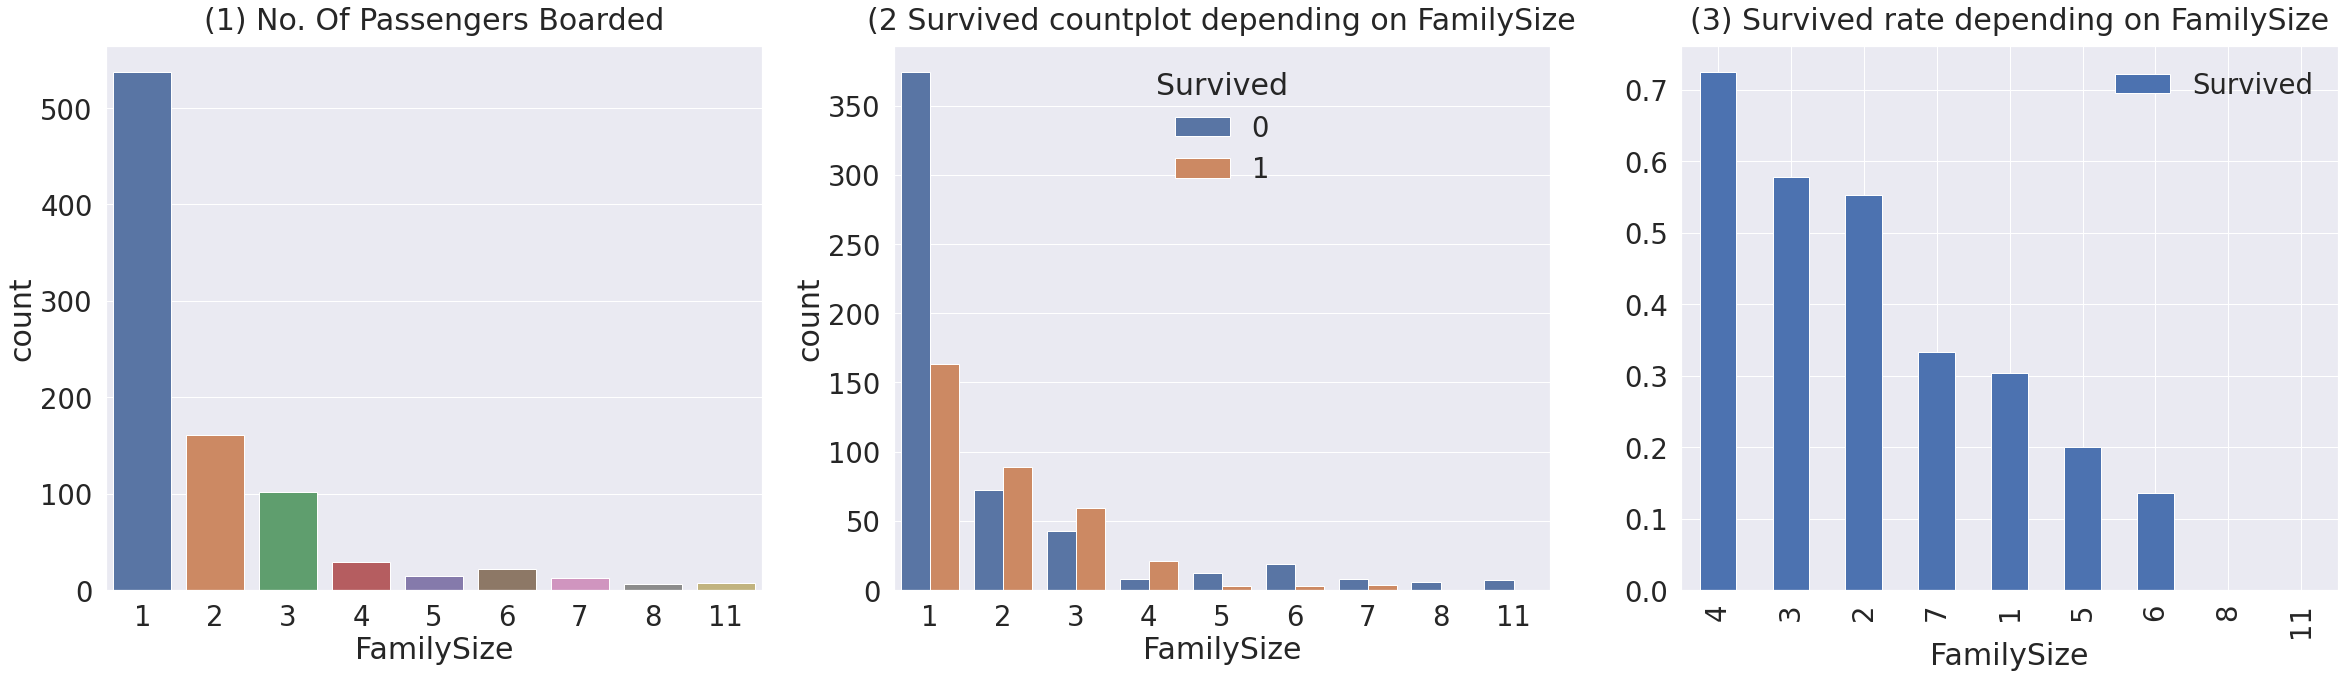

In [ ]:
f, ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2 Survived countplot depending on FamilySize', y=1.02)
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).\
mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- 가족 그래프 분석
 - (1)그래프를 보면 가족의 크기의 분포가 보이며 1명이 제일 많습니다
 - (2)그래프를 보면 2,3,4 명의 가족이 사망자 대비 많이 생존했습니다.
 - (3)그래프를 보면 4,3,2 명의 가족 순으로 살아남은 사람이 많습니다.

### 2.8 Fare(요금)

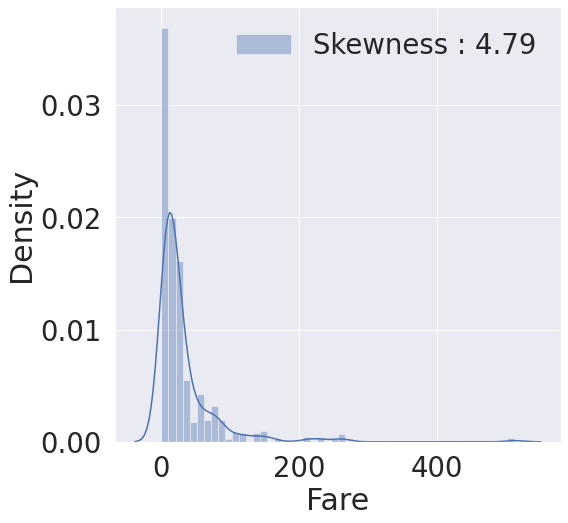

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.\
format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- 분포가 비대칭이므로 예측 시에 좋지 못한 결과값이 나올 수 있다.


In [ ]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() 
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

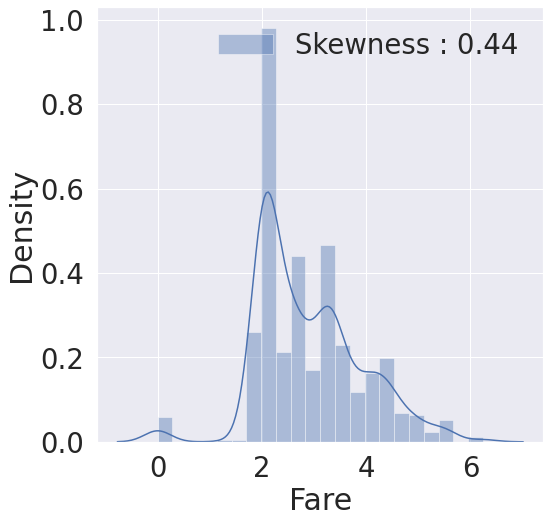

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.
format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- log를 취하여 비대칭성이 많이 사라짐
- 이 작업은 원랜 feature engineering 때 한다.
- 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering 이라고 한다.

### 2.9 Cabin(선실)
- 이 feature는 NaN이 약 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻기 어렵다.
- 그러므로 모델에 포함시키지 않음

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


### 2.10 Ticket(표)
- 표와 생존의 그래프를 만들어보자

In [ ]:
df_train['ticket_A']= df_train.Ticket.str.extract('(\d\d+)')

In [ ]:
df_train['ticket_A']

0        21171
1        17599
2      3101282
3       113803
4       373450
        ...   
886     211536
887     112053
888       6607
889     111369
890     370376
Name: ticket_A, Length: 891, dtype: object

- 숫자만 추출

In [ ]:
pd.crosstab(df_train['ticket_A'], df_train['Survived']).T.style.background_gradient(cmap='summer_r')

In [ ]:
df_train[['ticket_A', 'Survived']].groupby(['ticket_A'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,ticket_A,Survived
0,10482,1.0
266,2651,1.0
277,2668,1.0
276,2667,1.0
275,2666,1.0
...,...,...
354,3101292,0.0
353,3101290,0.0
350,3101287,0.0
68,12233,0.0
